<a href="https://colab.research.google.com/github/abuzar01440/abuzar-portfolio/blob/main/Fraud_M_tag_detection_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question No. 1

Explain the notion of data reduction and its significance in managing enormous datasets. Discuss the function of Principal Component Analysis (PCA) in data reduction, including how it reduces dimensionality while retaining the most relevant information. Provide a practical example of how to apply PCA on a dataset in Python, along with a description of the procedures involved.


**Answer**


**Data reduction:**

It involves transforming complex and high-dimensional data into a more manageable and compact form while preserving the essential information and patterns.

It might be effect these given below factors
* Improved Efficiency
* Increment in Performance
* Reduced Storage Requirements
* Reduce Computational cost

PCA is a popular dimensionality reduction technique widely used in data science. It works by identifying new variables called principal components (PCs) that are linear combinations of the original features. it helps in data reduction and effect the following factors which is given above

**Mian Goal**
PCA aims to preserve as much of the original data's variance as possible in the reduced dimensions. By selecting the principal components that explain the most variance, PCA ensures that the most important information is retained, while less relevant or redundant features are discarded

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fastag-fraud-detection-datesets-fictitious:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4314015%2F7415794%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240718%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240718T054321Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D249f9a1919487ea9bc99a2ddd35e96a4fff2f489fb8eae9d4dcf647f9cce3180d795d6d2b7fd3a17828c7ce64a6dcafb55c29a8efba39a389283b9bceb3fd1c209e077641002eda05c899bb2290c8ca17a2b3c0c4e5550cf15637550d956abe3f559d4bb3e533b290001211948379f553dd74388d9ee0c1ac5c3660ccadeeffd1f5fedf4ca780a6793221740786ebbc8433369ecc1572ce70027f99739a1fdd5534b8b4eca9dd25405229239f492e582935c38ad6bbcd04bd0b190e51d4a57edac017a3d1c1c2a67f9852a3830bc5d6ffef846b99427cd7bf1ea0e5c070d1e692064e5a0043791612ead47387dc586251a11d030f9923f92be986e80b90c637a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 108830 bytes downloaded
Downloaded and uncompressed: fastag-fraud-detection-datesets-fictitious
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fastag-fraud-detection-datesets-fictitious/FastagFraudDetection.csv


In [ ]:
#libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/kaggle/input/fastag-fraud-detection-datesets-fictitious/FastagFraudDetection.csv")
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [ ]:
df.isnull().sum()/df.shape[0] * 100

Transaction_ID            0.00
Timestamp                 0.00
Vehicle_Type              0.00
FastagID                 10.98
TollBoothID               0.00
Lane_Type                 0.00
Vehicle_Dimensions        0.00
Transaction_Amount        0.00
Amount_paid               0.00
Geographical_Location     0.00
Vehicle_Speed             0.00
Vehicle_Plate_Number      0.00
Fraud_indicator           0.00
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.TollBoothID.value_counts()

TollBoothID
B-102    1432
A-101    1428
C-103    1426
D-106     570
D-105     104
D-104      40
Name: count, dtype: int64

<ipython-input-8-be93f1f6506c>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')


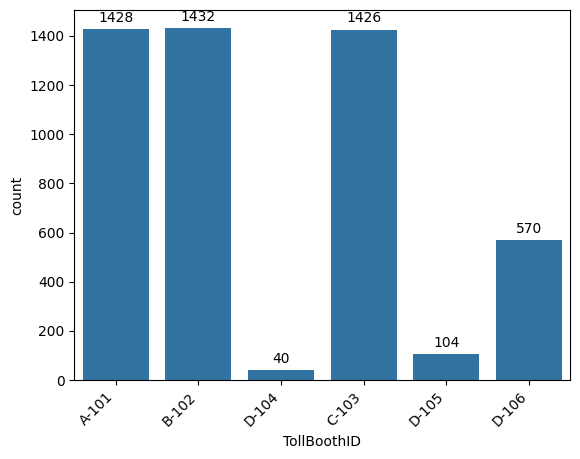

In [ ]:
bar =sns.countplot(x="TollBoothID", data=df)
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')
for bars_anotate in bar.patches:
    bar.annotate(format(bars_anotate.get_height(), '.0f'),
                   (bars_anotate.get_x() + bars_anotate.get_width() / 2,
                    bars_anotate.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

In [ ]:
df.drop(columns=["Timestamp", 'Transaction_ID'],inplace=True)

In [ ]:
df.shape

(5000, 11)

In [ ]:
df.head(3)

,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Vehicle_Type           5000 non-null   object
 1   FastagID               4451 non-null   object
 2   TollBoothID            5000 non-null   object
 3   Lane_Type              5000 non-null   object
 4   Vehicle_Dimensions     5000 non-null   object
 5   Transaction_Amount     5000 non-null   int64 
 6   Amount_paid            5000 non-null   int64 
 7   Geographical_Location  5000 non-null   object
 8   Vehicle_Speed          5000 non-null   int64 
 9   Vehicle_Plate_Number   5000 non-null   object
 10  Fraud_indicator        5000 non-null   object
dtypes: int64(3), object(8)
memory usage: 429.8+ KB


In [ ]:
df.describe()

,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.00000,5000.000000,5000.000000
mean,161.06200,141.261000,67.851200
std,112.44995,106.480996,16.597547
min,0.00000,0.000000,10.000000
25%,100.00000,90.000000,54.000000
50%,130.00000,120.000000,67.000000
75%,290.00000,160.000000,82.000000
max,350.00000,350.000000,118.000000


In [ ]:
df.select_dtypes(include="number").corr()

,Transaction_Amount,Amount_paid,Vehicle_Speed
Transaction_Amount,1.000000,0.870078,0.053229
Amount_paid,0.870078,1.000000,0.039027
Vehicle_Speed,0.053229,0.039027,1.000000


In [ ]:
# split the coordinates
df[['longitude', 'latitude']] = df['Geographical_Location'].str.strip('()').str.split(', ', expand=True)

# Convert the columns to float type
df['longitude'] = df['longitude'].astype(float)
df['latitude'] = df['latitude'].astype(float)

print("\nDataFrame with separated longitude and latitude:")
print(df)



DataFrame with separated longitude and latitude:
     Vehicle_Type         FastagID TollBoothID Lane_Type Vehicle_Dimensions  \
0            Bus   FTG-001-ABC-121       A-101   Express              Large   
1             Car  FTG-002-XYZ-451       B-102   Regular              Small   
2      Motorcycle              NaN       D-104   Regular              Small   
3           Truck  FTG-044-LMN-322       C-103   Regular              Large   
4             Van  FTG-505-DEF-652       B-102   Express             Medium   
...           ...              ...         ...       ...                ...   
4995        Truck  FTG-445-EDC-765       C-103   Regular              Large   
4996          Van  FTG-446-LMK-432       B-102   Express             Medium   
4997        Sedan  FTG-447-PLN-109       A-101   Regular             Medium   
4998          SUV  FTG-458-VFR-876       B-102   Express              Large   
4999         Bus   FTG-459-WSX-543       C-103   Regular              Large   

 

In [ ]:
df.head(3)

,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,longitude,latitude
0,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,13.059816,77.770687
1,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,13.059816,77.770687
2,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,13.059816,77.770687


In [ ]:
df.drop(("Geographical_Location"), axis=1, inplace=True)

In [ ]:
(categorical_columns:=df.select_dtypes(exclude="number").columns)

Index(['Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type',
       'Vehicle_Dimensions', 'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [ ]:
#drop NAN values
df.dropna(inplace=True)

In [ ]:
df.shape

(4451, 12)

In [ ]:
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df.select_dtypes(exclude="number").columns

Index([], dtype='object')

as we can see there is no string categorical data in the dataset we all convert into +ve integer

In [ ]:
# Data split into training and testing set
X = df.drop("Fraud_indicator", axis=1)
y = df["Fraud_indicator"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                    random_state=42, stratify=y)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3783, 11)
X_test shape: (668, 11)
y_train shape: (3783,)
y_test shape: (668,)


In [ ]:
# Standardize Features (Important):
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled


array([[ 1.38726796,  1.33928672, -0.08990135, ...,  1.16444834,
         0.21288352, -1.18637005],
       [ 0.91103977, -0.13349032,  1.0325304 , ..., -1.2617306 ,
        -1.37738418,  0.70773137],
       [-0.51764481,  0.10666172,  2.15496216, ..., -0.09772567,
        -0.62687898, -0.66142869],
       ...,
       [ 0.91103977, -0.51897708,  1.0325304 , ..., -1.4432655 ,
         1.56519782, -0.44329448],
       [-0.04141662, -0.20732347, -0.08990135, ...,  1.27664158,
         1.56519782, -0.44329448],
       [-0.99387301, -0.93088834, -1.21233311, ..., -1.34821289,
        -0.62687898, -0.66142869]])

# APPLY PCA

In [ ]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit on training data and transform
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
X_train_pca

array([[-1.11866478,  0.86066202, -1.64350023, ...,  1.08018895,
        -0.09598683,  0.08784793],
       [ 1.47328916, -1.3537436 , -0.05779841, ..., -0.31536961,
         0.7358091 ,  1.13728146],
       [-1.73052743, -0.50738406, -1.25384648, ..., -0.64798008,
        -0.63152251, -0.38114496],
       ...,
       [ 2.60325426, -1.25691849, -1.12541161, ..., -0.20046441,
        -0.74993883,  0.11828493],
       [ 0.1639511 , -0.78677424, -0.97923133, ...,  0.01630488,
         0.8105065 , -0.54042731],
       [-2.32461238,  0.61962527,  0.87849064, ..., -0.77170935,
        -0.55789077,  0.14651652]])

In [ ]:
print(pca.explained_variance_ratio_)

[0.27248345 0.1468282  0.11474012 0.10203775 0.09391433 0.09011806
 0.06387614 0.04379545 0.0343042  0.02684218 0.01106011]


In [ ]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
X_train_pca

array([[-1.11866478,  0.86066202, -1.64350023],
       [ 1.47328916, -1.3537436 , -0.05779841],
       [-1.73052743, -0.50738406, -1.25384648],
       ...,
       [ 2.60325426, -1.25691849, -1.12541161],
       [ 0.1639511 , -0.78677424, -0.97923133],
       [-2.32461238,  0.61962527,  0.87849064]])

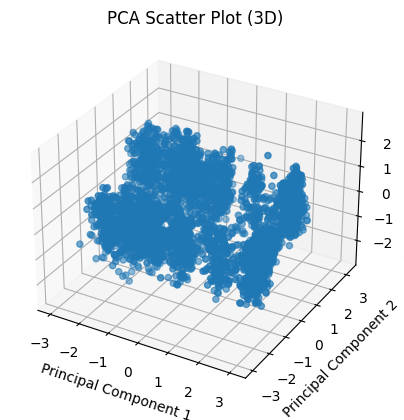

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2])  # Plot PC1 vs. PC2 vs. PC3

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA Scatter Plot (3D)')
plt.show()


In [ ]:
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, jaccard_score, confusion_matrix,classification_report


In [ ]:
classifier = LGBMClassifier()
classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)

[LightGBM] [Info] Number of positive: 2948, number of negative: 835
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 3783, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.779276 -> initscore=1.261451
[LightGBM] [Info] Start training from score 1.261451


In [ ]:
y_pred[0:5]

array([1, 1, 1, 0, 1])

In [ ]:
round(accuracy_score(y_test, y_pred),4)

0.9057

In [ ]:
round(jaccard_score(y_test, y_pred, pos_label=1),4)

0.8893

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 99,  49],
       [ 14, 506]])

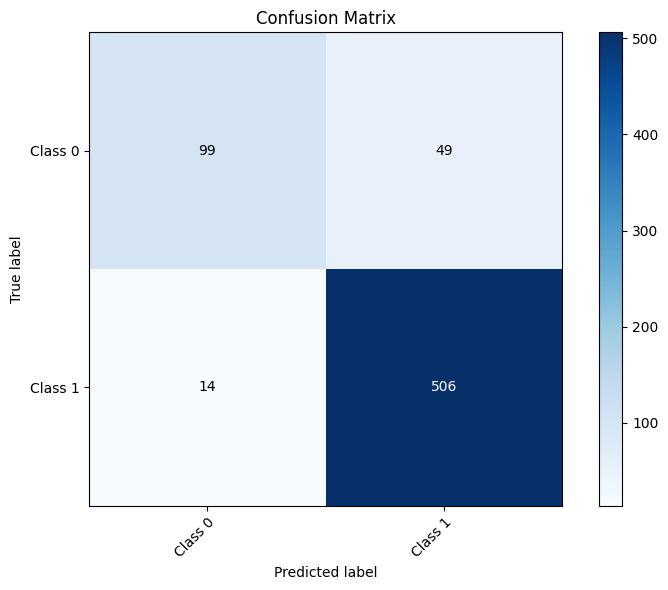

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
# Plot confusion matrix as an image
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'],
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76       148
           1       0.91      0.97      0.94       520

    accuracy                           0.91       668
   macro avg       0.89      0.82      0.85       668
weighted avg       0.90      0.91      0.90       668



# Question No 2
Discuss the data integration process, with an emphasis on the problems and solutions for merging data from diverse sources. Explain the principle of multimodal data and how combining several forms of data (for example, text, images, and numerical data) can improve the performance of a machine learning model. Give examples of situations in which the integration of multimodal data can result in substantial enhancements in the accuracy and generalization of the model.

**ANSWER**

**Data Integration Process:**

* Data Collection
* Data Understanding
* Data Cleaning and Preprocessing
* Schema Integration
* Data Transformation and Loading (ETL)

**Problems and Solutions**

There are a number of strategies that can be used to overcome the difficulties in data integration. First off, when working with various data formats, converting data to a common format such as CSV or JSON makes the merging process easier. Secondly, structural disparities are resolved by mapping similar attributes from several sources to a single schema. Thirdly, uniform interpretation is ensured by developing a shared ontology and language, which reduces semantic disparities. Thorough data cleansing also resolves concerns with data quality by removing duplicates, inconsistencies, and errors. Ensuring the security of sensitive data during integration is achieved by using appropriate measures. Finally, employing scalable infrastructures and tools for data integration guarantees effective management of substantial data quantities, facilitating smooth integration and analysis.


**How Combining Multimodal Data Enhances Machine Learning Models:**


* Improved Accuracy
* Better Generalization
* Robustness to Noise
* Novel Insights: Combining multimodal data can reveal hidden patterns and relationships that would be missed with single-modality analysis.

#### Examples of Multimodal Data Integration

* Sentiment Analysis: Combining text and audio data (tone of voice, intonation) can improve sentiment analysis accuracy.
* Medical Diagnosis: Integrating medical images, clinical reports, and patient data can lead to more accurate diagnoses and treatment plans.
* Autonomous Vehicles: Combining sensor data (LiDAR, radar, camera) with maps and GPS data enhances the perception and decision-making capabilities of self-driving cars.